    index  year
0    2009    39
1    1999    37
2    2003    35
3    2007    34
4    1994    30
5    2006    29
6    2016    29
7    2005    29
8    2002    29
9    2004    26
10   1996    26
11   2010    25
12   2012    25
13   2011    25
14   1998    25
15   1987    24
16   2013    24
17   2000    23
18   1986    23
19   1990    23
20   1983    23
21   1984    22
22   1992    21
23   2001    21
24   1985    21
25   2015    19
26   1997    19
27   1989    18
28   2014    18
29   2008    18
30   1993    17
31   1981    17
32   1982    15
33   1988    15
34   2017    15
35   1991    14
36   2018    13
37   2019    13
38   1995    13
39   1979    13
40   1980     9
41   1975     7
42   1972     3
43   1977     3
44   1978     2
45   1974     2
46   1971     1


<AxesSubplot:xlabel='index', ylabel='year'>

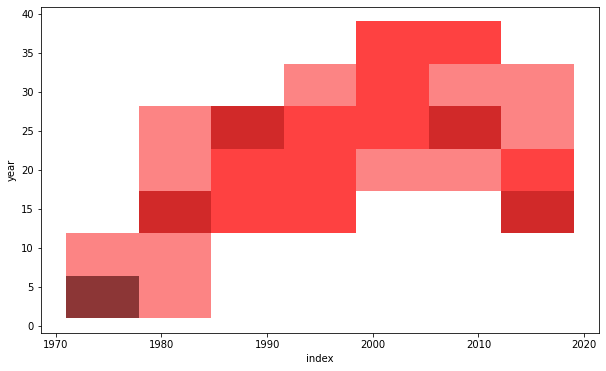

In [52]:
#Q1]

#Import important libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("odi_1.csv")
df[['Day','year']] = df['Match Date'].str.split(',', expand=True)  #Splitting Match Date column into Day and year
df['year'] = df['year'].astype(int) 
x=input("Enter the Country")  #Take the input from user for a articular country
df=df.drop("Match Date",axis="columns")
a=df.loc[(df['Team 1']==x)|(df['Team 2']==x)]
m=pd.DataFrame(a.year.value_counts())  #Count total number of matches played by the input country in the entire year
m=m.reset_index()
print(m)
plt.figure(figsize=(10,6))
sns.histplot(m,x='index',y='year',color='red')  #Plotting the histplot

#This is for Australia

In [2]:
# Q2] Filter the Dataset for the year 2018

filtered=df.loc[df['year']==2018]  
print(filtered)

       Scorecard       Team 1        Team 2        Winner     Margin  \
3945  ODI # 3946  New Zealand      Pakistan   New Zealand    61 runs   
3946  ODI # 3947  New Zealand      Pakistan   New Zealand  8 wickets   
3947  ODI # 3948       U.A.E.       Ireland       Ireland  4 wickets   
3948  ODI # 3949  New Zealand      Pakistan   New Zealand   183 runs   
3949  ODI # 3950       U.A.E.       Ireland       Ireland    67 runs   
...          ...          ...           ...           ...        ...   
4068  ODI # 4069    Australia  South Africa  South Africa    40 runs   
4069  ODI # 4070  New Zealand      Pakistan     no result        NaN   
4070  ODI # 4071   Bangladesh   West Indies    Bangladesh  5 wickets   
4071  ODI # 4072   Bangladesh   West Indies   West Indies  4 wickets   
4072  ODI # 4073   Bangladesh   West Indies    Bangladesh  8 wickets   

           Ground           HostCountry     Day  year  
3945   Wellington           New Zealand   Jan 6  2018  
3946       Nelson      

In [4]:
#Filter only team 1 and and team 2 columns

s=filtered.filter(['Team 1','Team 2'])
print(s.head())

           Team 1    Team 2
3945  New Zealand  Pakistan
3946  New Zealand  Pakistan
3947       U.A.E.   Ireland
3948  New Zealand  Pakistan
3949       U.A.E.   Ireland


In [5]:
# Q3]
#Finding total number of matches played by every country  in 2018

df1 = s.melt(var_name='columns', value_name='index')
comb=pd.crosstab(index=df1['index'], columns=df1['columns'])
final=pd.DataFrame(comb['Team 1']+comb['Team 2'])
print(final.sort_values(by=0,ascending=False))



               0
index           
Zimbabwe      26
England       24
India         20
Afghanistan   20
Bangladesh    20
Pakistan      18
West Indies   18
South Africa  17
Sri Lanka     17
Ireland       13
Australia     13
New Zealand   13
Scotland      11
U.A.E.        11
Hong Kong      6
P.N.G.         4
Nepal          3
Netherlands    2


In [6]:
# Q4] Finding the top winners 
filtered['Winner'].value_counts()
#England won the maximum matches

England         17
India           14
Bangladesh      13
Afghanistan     12
South Africa     9
Pakistan         8
West Indies      8
Ireland          8
New Zealand      8
Sri Lanka        6
Scotland         5
Zimbabwe         5
U.A.E.           4
tied             3
Australia        2
no result        2
Hong Kong        1
P.N.G.           1
Netherlands      1
Nepal            1
Name: Winner, dtype: int64

In [7]:
# Q5] Mapping the odi's based on grounds
l=filtered.groupby(['Ground','Scorecard'])
print(l.first())


                                    Team 1       Team 2       Winner  \
Ground             Scorecard                                           
Abu Dhabi          ODI # 4038  Afghanistan    Sri Lanka  Afghanistan   
                   ODI # 4041  Afghanistan   Bangladesh  Afghanistan   
                   ODI # 4043  Afghanistan     Pakistan     Pakistan   
                   ODI # 4045  Afghanistan   Bangladesh   Bangladesh   
                   ODI # 4047   Bangladesh     Pakistan   Bangladesh   
...                                    ...          ...          ...   
Thiruvananthapuram ODI # 4064        India  West Indies        India   
Visakhapatnam      ODI # 4059        India  West Indies         tied   
Wellington         ODI # 3946  New Zealand     Pakistan  New Zealand   
                   ODI # 3957  New Zealand     Pakistan  New Zealand   
                   ODI # 3982  New Zealand      England      England   

                                  Margin           HostCountry 

In [45]:
# Q6] Finding country which played maximum matches in its home ground
filtered['HostCountry'].value_counts()
# Zimbabwe played the most matches in their home grounds

Zimbabwe                 28
United Arab Emirates     27
Bangladesh               13
United Kingdom           11
Sri Lanka                10
RSA                       9
New Zealand               8
Australia                 8
India                     6
Canada                    2
USA                       2
Netherlands               2
Saint Kitts and Nevis     1
Malaysia                  1
Name: HostCountry, dtype: int64

In [8]:
# Q8] Top Countries which won by runs

m=filtered.filter(['Winner','Margin'])
runs= m[m['Margin'].astype(str).str.contains('runs')]
runs[['runs','del']] = runs['Margin'].str.split(' ', expand=True)
runs=runs.drop(['del','Margin'],axis=1)
runs['runs'] = runs['runs'].astype(int)
runs=runs.sort_values('runs',ascending=False)
print(runs.iloc[[0,1,2]]) 

        Winner  runs
4019  Pakistan   244
4010   England   242
3994   Ireland   226


C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [9]:
# Q9] Month in which maximum matches were played

y=filtered.filter(['Day'])
y[['Month','Date']] = y['Day'].str.split(' ', expand=True)
y=y.drop(['Day','Date'],axis=1)
n=pd.DataFrame(y['Month'].value_counts())
n = n.reset_index()

print(n)


  index  Month
0   Mar     26
1   Jan     23
2   Sep     14
3   Oct     14
4   Feb     13
5   Jul     12
6   Aug     10
7   Nov      7
8   Jun      6
9   Dec      3


<AxesSubplot:xlabel='index', ylabel='Month'>

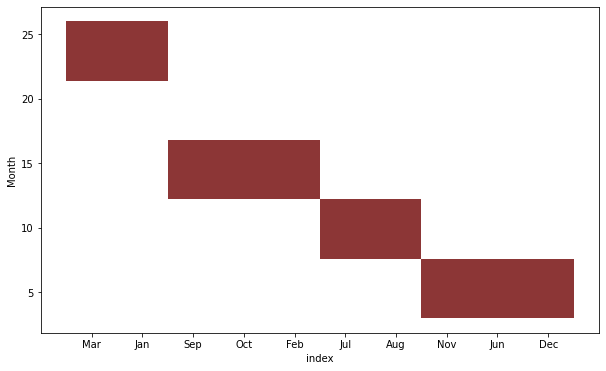

In [10]:
# Q10] Making a histogram of the table above

plt.figure(figsize=(10,6))
sns.histplot(n,x='index',y='Month',color='red')

In [11]:
# Q11] Finding if india won more matched by playing in the first inning or second inning

i1=filtered.filter(['Team 1','Winner'])
c=i1.loc[(i1['Team 1']=='India')&(i1['Winner']=='India')].count()
print (c)
i2=filtered.filter(['Team 2','Winner'])
d=i2.loc[(i2['Team 2']=='India')&(i2['Winner']=='India')].count()
print(d)

#Won more while playing in the second inning

Team 1    5
Winner    5
dtype: int64
Team 2    9
Winner    9
dtype: int64


In [46]:
# Q12] Finding team which lost the maximum matches

m=filtered['Winner']
a=pd.DataFrame(m.value_counts())
a=a.reset_index()
z=a.drop([a.index[13],a.index[15]])
z=z.sort_values(by='index')
z=z.reset_index()
z=z.drop(['level_0'],axis=1)
o=final[0]-z['Winner']
final["Loss"]=final[0]-z['Winner']
final["Won"]=z['Winner']
print(final)


           index   0  Loss  Won
0    Afghanistan  20     8   12
1      Australia  13    11    2
2     Bangladesh  20     7   13
3        England  24     7   17
4      Hong Kong   6     5    1
5          India  20     6   14
6        Ireland  13     5    8
7          Nepal   3     2    1
8    Netherlands   2     1    1
9    New Zealand  13     5    8
10        P.N.G.   4     3    1
11      Pakistan  18    10    8
12      Scotland  11     6    5
13  South Africa  17     8    9
14     Sri Lanka  17    11    6
15        U.A.E.  11     7    4
16   West Indies  18    10    8
17      Zimbabwe  26    21    5


In [47]:
# Q7] Performance of India in that year

a=final.loc[(final['index']=='India')]
print(a)

   index   0  Loss  Won
5  India  20     6   14


In [44]:
print(final[final.Loss==final.Loss.max()])

       index   0  Loss
17  Zimbabwe  26    21


In [14]:
# Q13] Dividing the column margin by runs and by wickets

m=filtered.filter(['Margin'])
run_win= m[m['Margin'].astype(str).str.contains('runs')]
run_win.columns=['By runs']
wicket_win=m[m['Margin'].astype(str).str.contains('wickets')]
wicket_win.columns=['By Wickets']
print(run_win)
print(wicket_win)
print(filtered)



       By runs
3945   61 runs
3948  183 runs
3949   67 runs
3954   12 runs
3955   24 runs
...        ...
4061   43 runs
4062  224 runs
4065   47 runs
4066    7 runs
4068   40 runs

[63 rows x 1 columns]
      By Wickets
3946   8 wickets
3947   4 wickets
3950   5 wickets
3951   8 wickets
3952   5 wickets
3953   6 wickets
3957   4 wickets
3961   5 wickets
3962   4 wickets
3964  10 wickets
3965   3 wickets
3968   6 wickets
3969   9 wickets
3972   5 wickets
3974   6 wickets
3976  10 wickets
3977   8 wickets
3979   3 wickets
3980   6 wickets
3982   7 wickets
3984   4 wickets
3985   4 wickets
3988   5 wickets
3990   6 wickets
3991   7 wickets
3996   3 wickets
4001   4 wickets
4002   5 wickets
4005   5 wickets
4006   7 wickets
4008   3 wickets
4011   6 wickets
4013   8 wickets
4016   9 wickets
4017   8 wickets
4018   9 wickets
4024   5 wickets
4026   4 wickets
4032   3 wickets
4034   8 wickets
4036   8 wickets
4039   8 wickets
4041   7 wickets
4042   3 wickets
4043   9 wickets
4047   3 wicket

In [15]:
# Q14] Number of matches which ended with no reults in each month

result=filtered.filter(['Winner','Day'])
no_result=result.loc[(result['Winner']=='no result')]
print(no_result)

         Winner     Day
4051  no result  Oct 10
4069  no result  Nov 11
